In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

plt.style.use('dark_background')

In [2]:
!gdown 1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR

Downloading...
From: https://drive.google.com/uc?id=1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR
To: /workspaces/Weekend_Scratching/cars24-car-price-cleaned.csv
100%|██████████████████████████████████████| 1.69M/1.69M [00:00<00:00, 4.43MB/s]


In [3]:
df= pd.read_csv(r"cars24-car-price-cleaned.csv")
df.head(3)

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.7,796.0,46.3,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.9,1197.0,82.0,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.0,1197.0,80.0,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0


In [4]:
df.shape, df['model'].nunique(), df['make'].nunique()

((19820, 18), 3233, 41)

### Target encoding the make and model features

In [5]:
df['make'] = df.groupby('make')['selling_price'].transform('mean')
df['model']= df.groupby('model')['selling_price'].transform('mean')
df.shape

(19820, 18)

In [6]:
scaler = MinMaxScaler()
df= pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

df.head(5)

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.043684,0.689655,0.031553,0.135345,0.117891,0.066506,0.310345,0.194048,0.041550,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.252397,0.827586,0.005237,0.128448,0.177281,0.123994,0.172414,0.232517,0.218382,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.089795,0.620690,0.015764,0.112069,0.177281,0.120773,0.379310,0.232517,0.149143,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.095134,0.689655,0.009711,0.145862,0.147808,0.100000,0.310345,0.194048,0.093193,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.262104,0.793103,0.007869,0.161810,0.221860,0.150709,0.206897,0.252367,0.313574,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
y = df['selling_price']
x= df.drop(columns= ['selling_price'], axis = 1)
y.shape, x.shape

((19820,), (19820, 17))

##### therefore, we got to predict
###### 1. one output feature
###### 2. using 17 input feature

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 14)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((13874, 17), (5946, 17), (13874,), (5946,))

#### linear regression but univariate
#### using 1 feature to train linear regression model

[0.99862062] 0.0012657002913222248


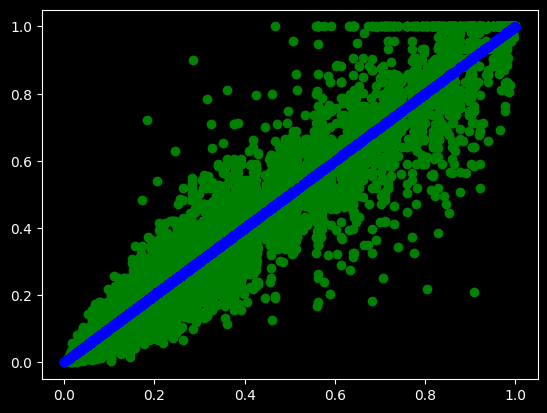

In [10]:
x1_train = x_train[['model']]
x1_test = x_test[['model']]
x1 = x[['model']]
model = LinearRegression()

model.fit(x1_train, y_train)
y1_pred= model.predict(x1)
print(model.coef_ , model.intercept_)

plt.scatter(x1, y, color= 'green')
plt.scatter(x1, y1_pred, color= 'blue')
plt.show()

#### Multivariate

In [11]:
x.shape, y.shape

((19820, 17), (19820,))

#### trying ot generalise the model for the whole data

In [12]:
model.fit(x_train, y_train)

LinearRegression()

In [13]:
model.coef_

array([ 7.67317333e+11, -2.61108398e-01, -2.38733828e-01,  6.53231387e-02,
        6.12306260e-02,  7.67317333e+11,  7.52280128e-02,  8.55550404e-01,
       -6.21753381e-03, -4.08849694e-03,  7.01597940e-03,  1.43980277e-01,
        1.66031600e-02, -6.72299881e-03, -2.12315255e-03, -1.24965270e-02,
       -2.06765790e-02])

In [14]:
model.intercept_

np.float64(-767317332629.1854)

In [15]:
y_pred= model.predict(x_test)
y_pred

array([0.16174316, 0.83374023, 0.03088379, ..., 0.98400879, 0.41650391,
       0.38049316])

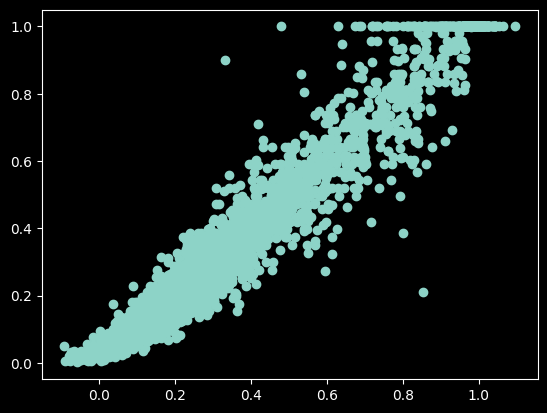

In [16]:
plt.scatter(y_pred, y_test)

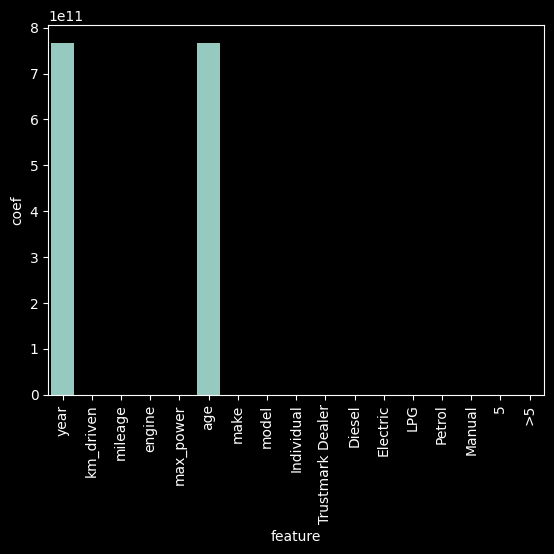

In [17]:
## pull up some feature importance based on respective coefficients
feat_coef = pd.DataFrame(data= list(zip(x_test.columns, np.abs(model.coef_))), columns= ['feature', 'coef'])

sns.barplot(data = feat_coef, x= 'feature', y= 'coef')
plt.xticks(rotation= 90)
plt.show()

In [18]:
print("the most important feature is : ", x_test.columns[np.argmax(np.abs(model.coef_))])
print("the least important featurs is: ", x_test.columns[np.argmin(np.abs(model.coef_))])

the most important feature is :  year
the least important featurs is:  Manual


In [19]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        # Initialize the learning rate and number of iterations
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, X, y):
        # Number of training examples and number of features
        self.m, self.n = X.shape
        
        # Initialize weights and bias to zeros
        self.W = np.zeros(self.n)
        self.b = 0
        
        # Store the training data
        self.X = X
        self.y = y
        
        # Gradient Descent
        for i in range(self.iterations):
            self.update_weights()
    
    def update_weights(self):
        # Predict the output
        y_pred = self.predict(self.X)
        
        # Calculate the gradients
        dW = - (2 * (self.X.T).dot(self.y - y_pred)) / self.m
        db = - 2 * np.sum(self.y - y_pred) / self.m
        
        # Update the weights and bias
        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db
    
    def predict(self, X):
        # Predict the output using the learned weights and bias
        return np.dot(X, self.W) + self.b

    def r2_score(self, X, y):
        # Calculate the R-squared score
        y_pred = self.predict(X)
        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - y.mean()) ** 2)
        return 1 - (ss_res / ss_tot)

# Example usage:
if __name__ == "__main__":
    # Sample data
    X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
    y = np.dot(X, np.array([1, 2])) + 3

    # Create the Linear Regression model
    model = LinearRegression(learning_rate=0.01, iterations=1000)
    
    # Train the model
    model.fit(X, y)
    
    # Make predictions
    predictions = model.predict(X)
    print("Predictions:", predictions)
    
    # Calculate R-squared score
    score = model.r2_score(X, y)
    print("R-squared score:", score)


Predictions: [ 5.83859798  7.85531169  9.0827763  11.09949001]
R-squared score: 0.9950972693775649
